In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="2kSqTb6EmXTlj8h0sgi7")
project = rf.workspace("mmt-kcsv2").project("waste-detection-cbffo")
version = project.version(3)
dataset = version.download("yolov5")  # Downloads dataset in YOLO format

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-Detection-3 in yolov5pytorch:: 100%|██████████| 14588/14588 [00:02<00:00, 6548.89it/s]


In [3]:
import yaml

# Load the YAML
yaml_path = "/content/Waste-Detection-3/data.yaml"
with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

# Update the paths
data['train'] = "/content/Waste-Detection-3/train/images"
data['val'] = "/content/Waste-Detection-3/valid/images"
data['test'] = "/content/Waste-Detection-3/test/images"

# Save the YAML
with open(yaml_path, "w") as f:
    yaml.dump(data, f)

print("data.yaml updated successfully!")

data.yaml updated successfully!


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

# Create YOLO model
model = YOLO('yolov8n.pt')  # use yolov8n (nano) for real-time, or yolov8s/m/l for better accuracy

# Train model
model.train(
    data='/content/Waste-Detection-3/data.yaml',  # your dataset YAML file
    epochs=50,
    imgsz=640,
    batch=16,
    device=0  # 0 for GPU, 'cpu' if no GPU
)

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Waste-Detection-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcdc0498230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

[Errno 2] No such file or directory: '{HOME}'
/content


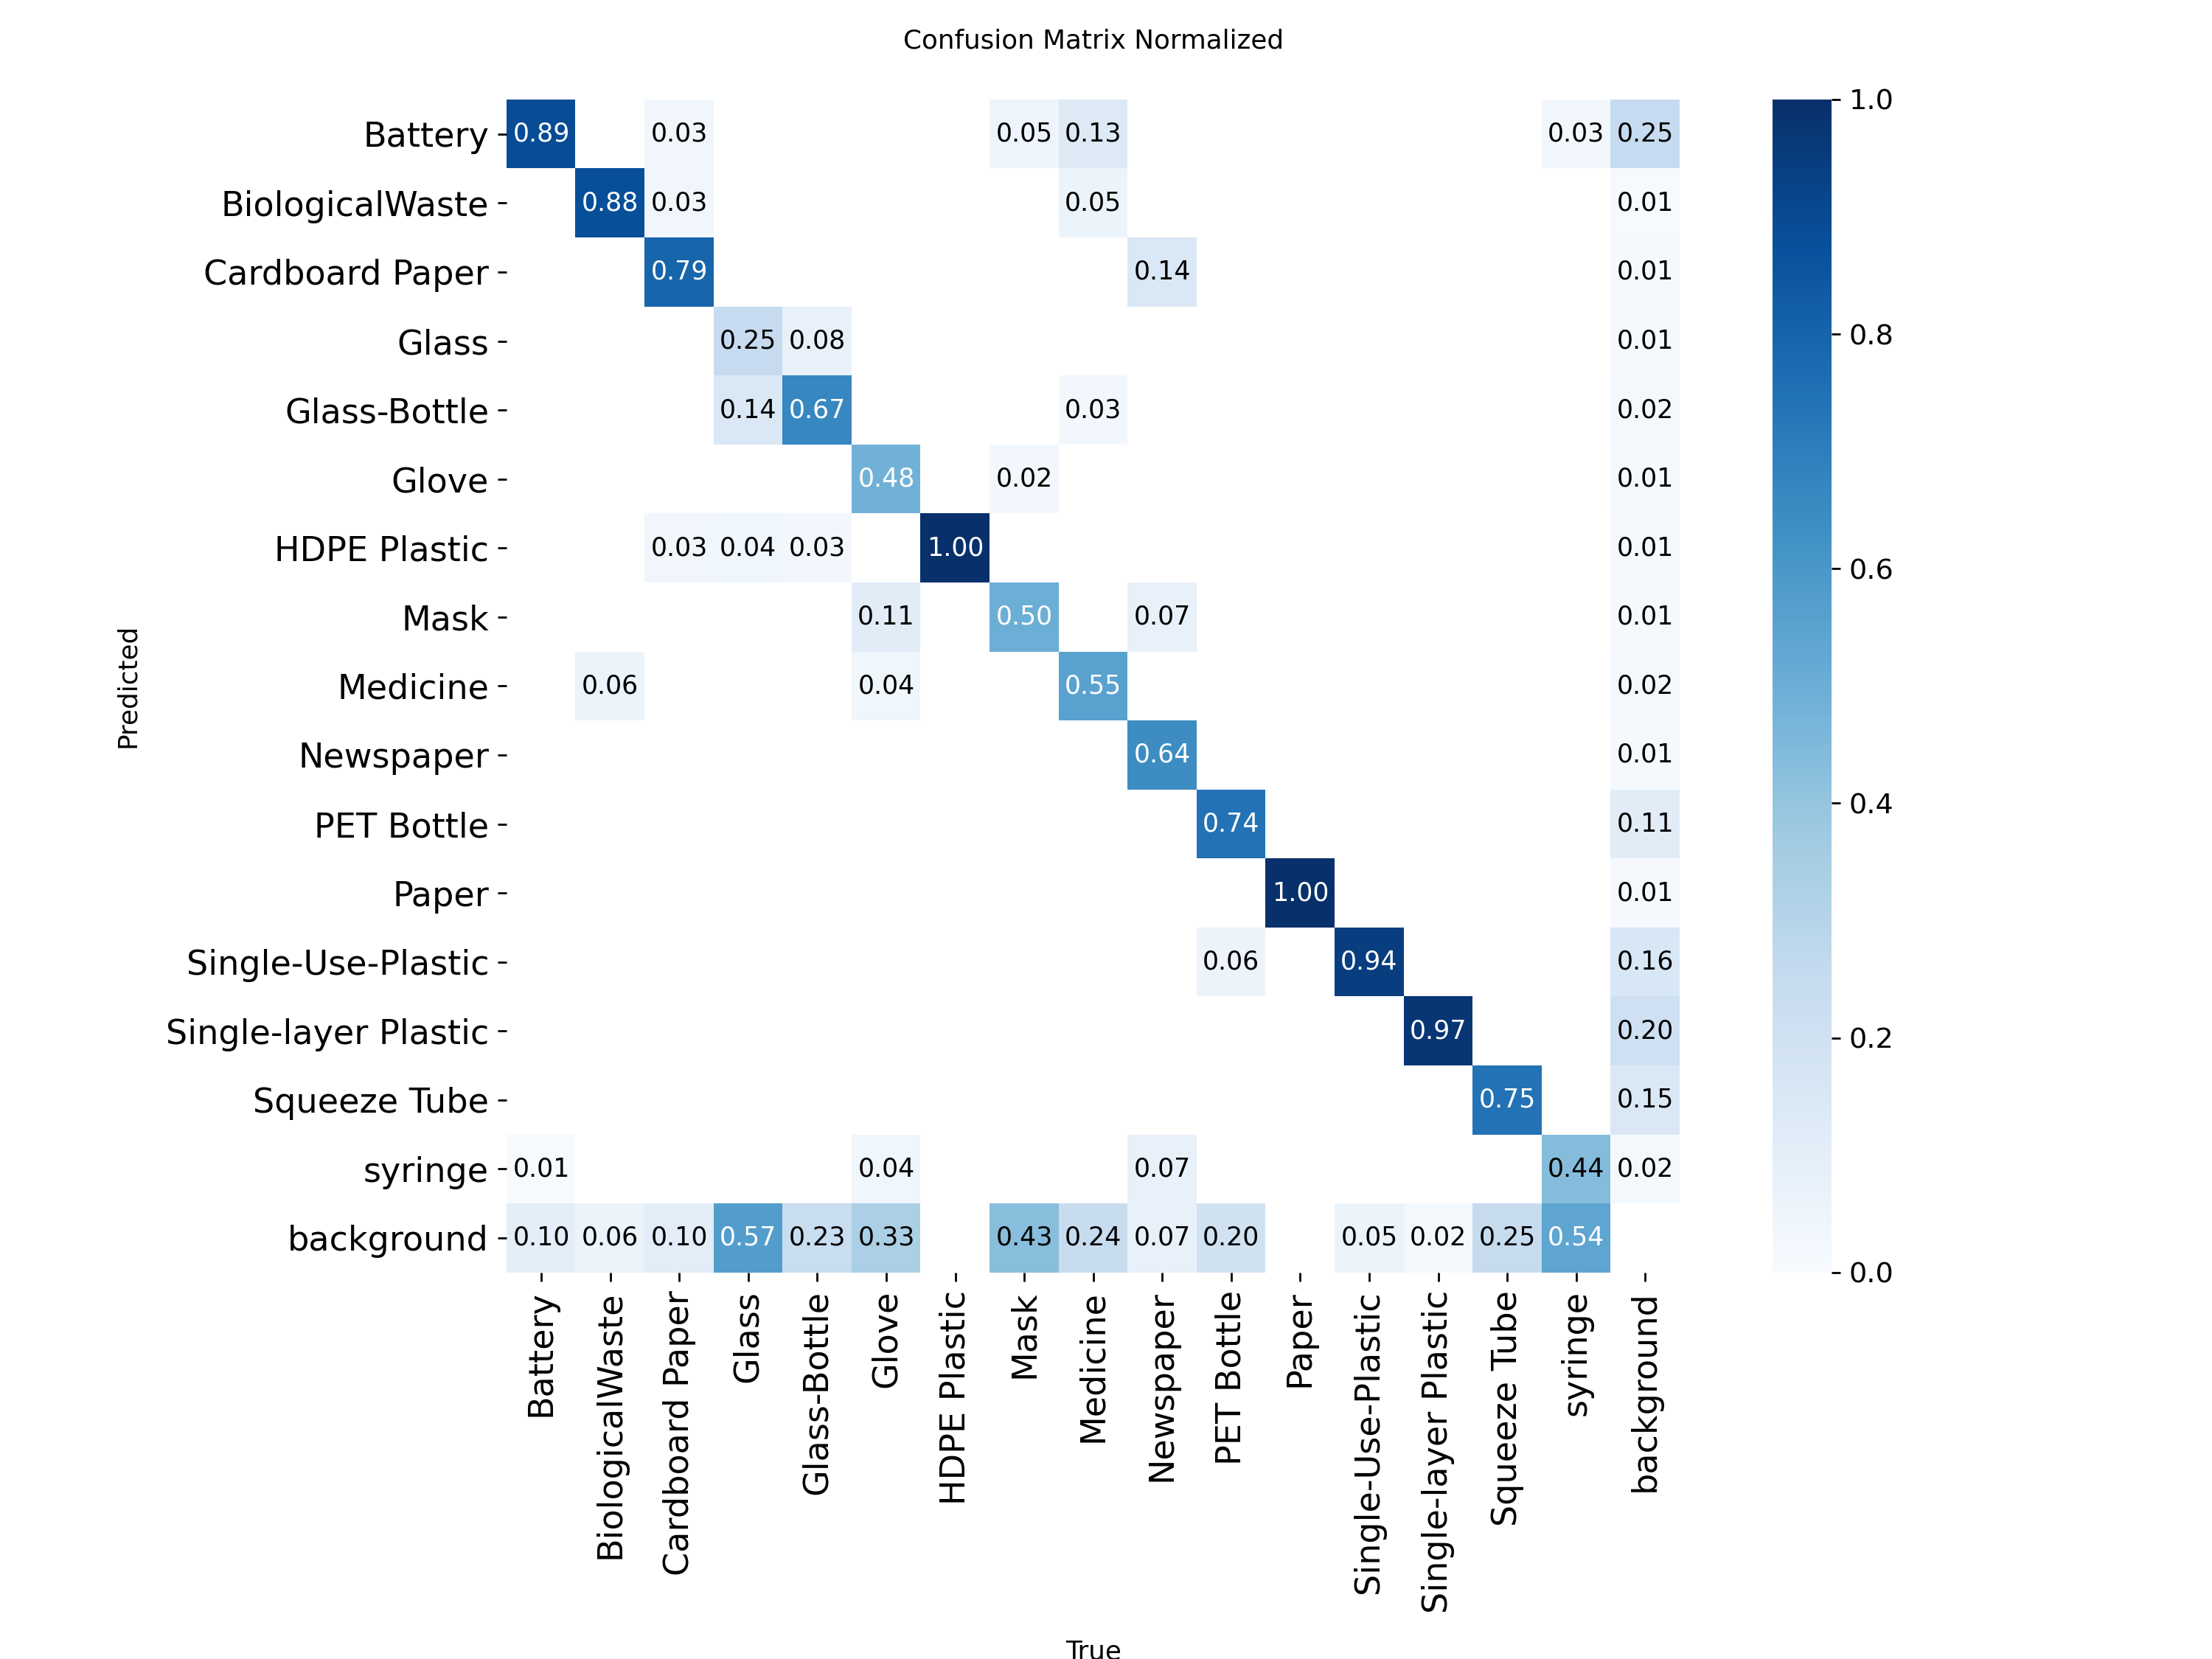

In [8]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/confusion_matrix_normalized.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


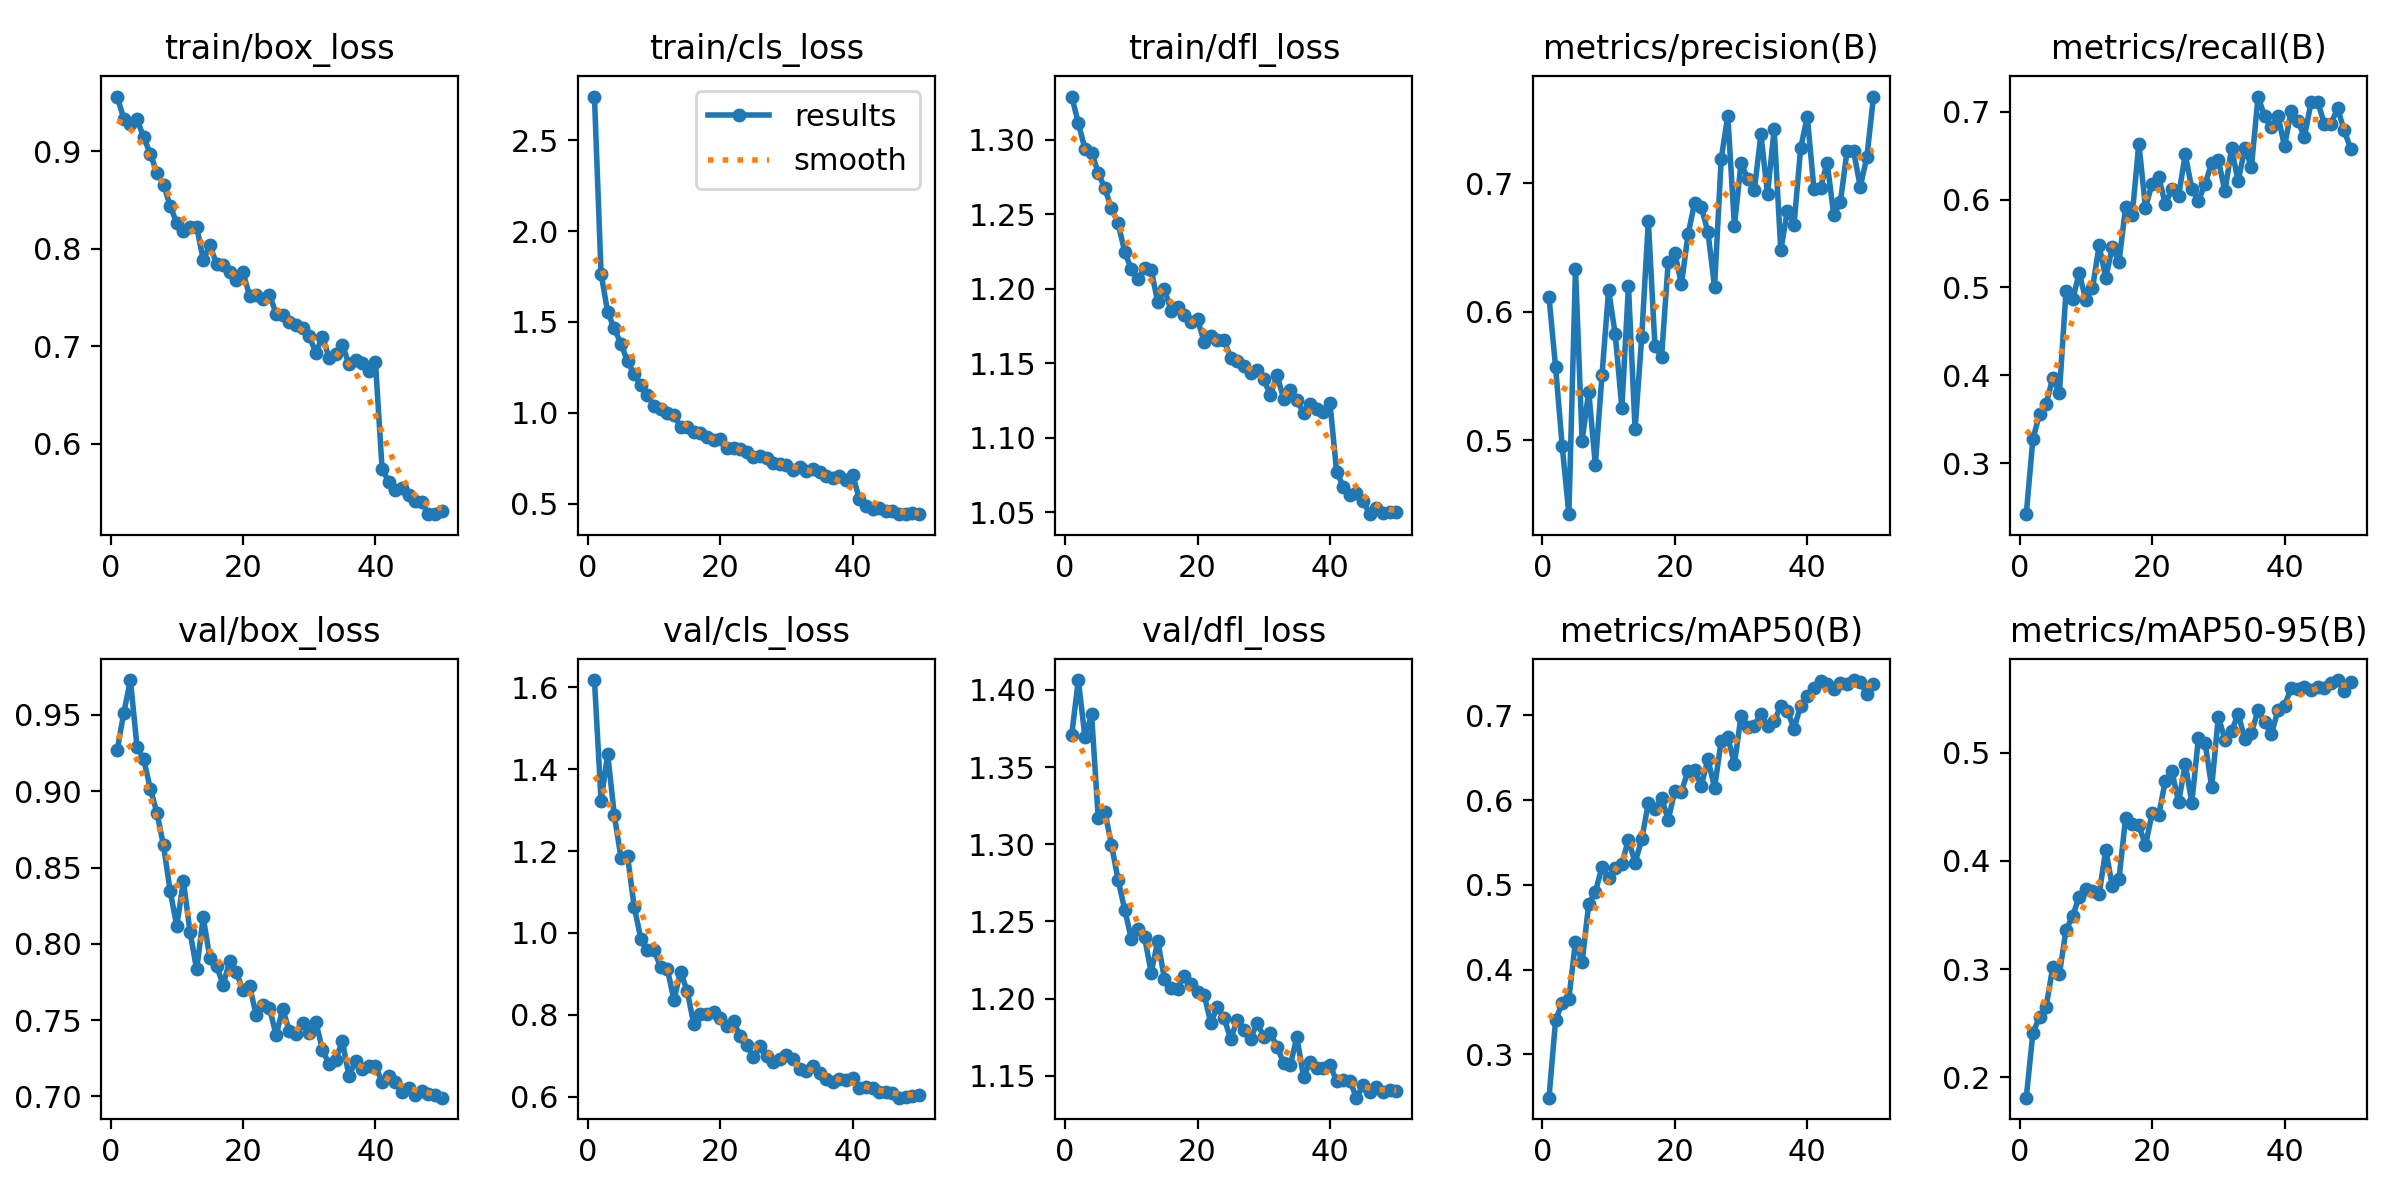

In [10]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

/content


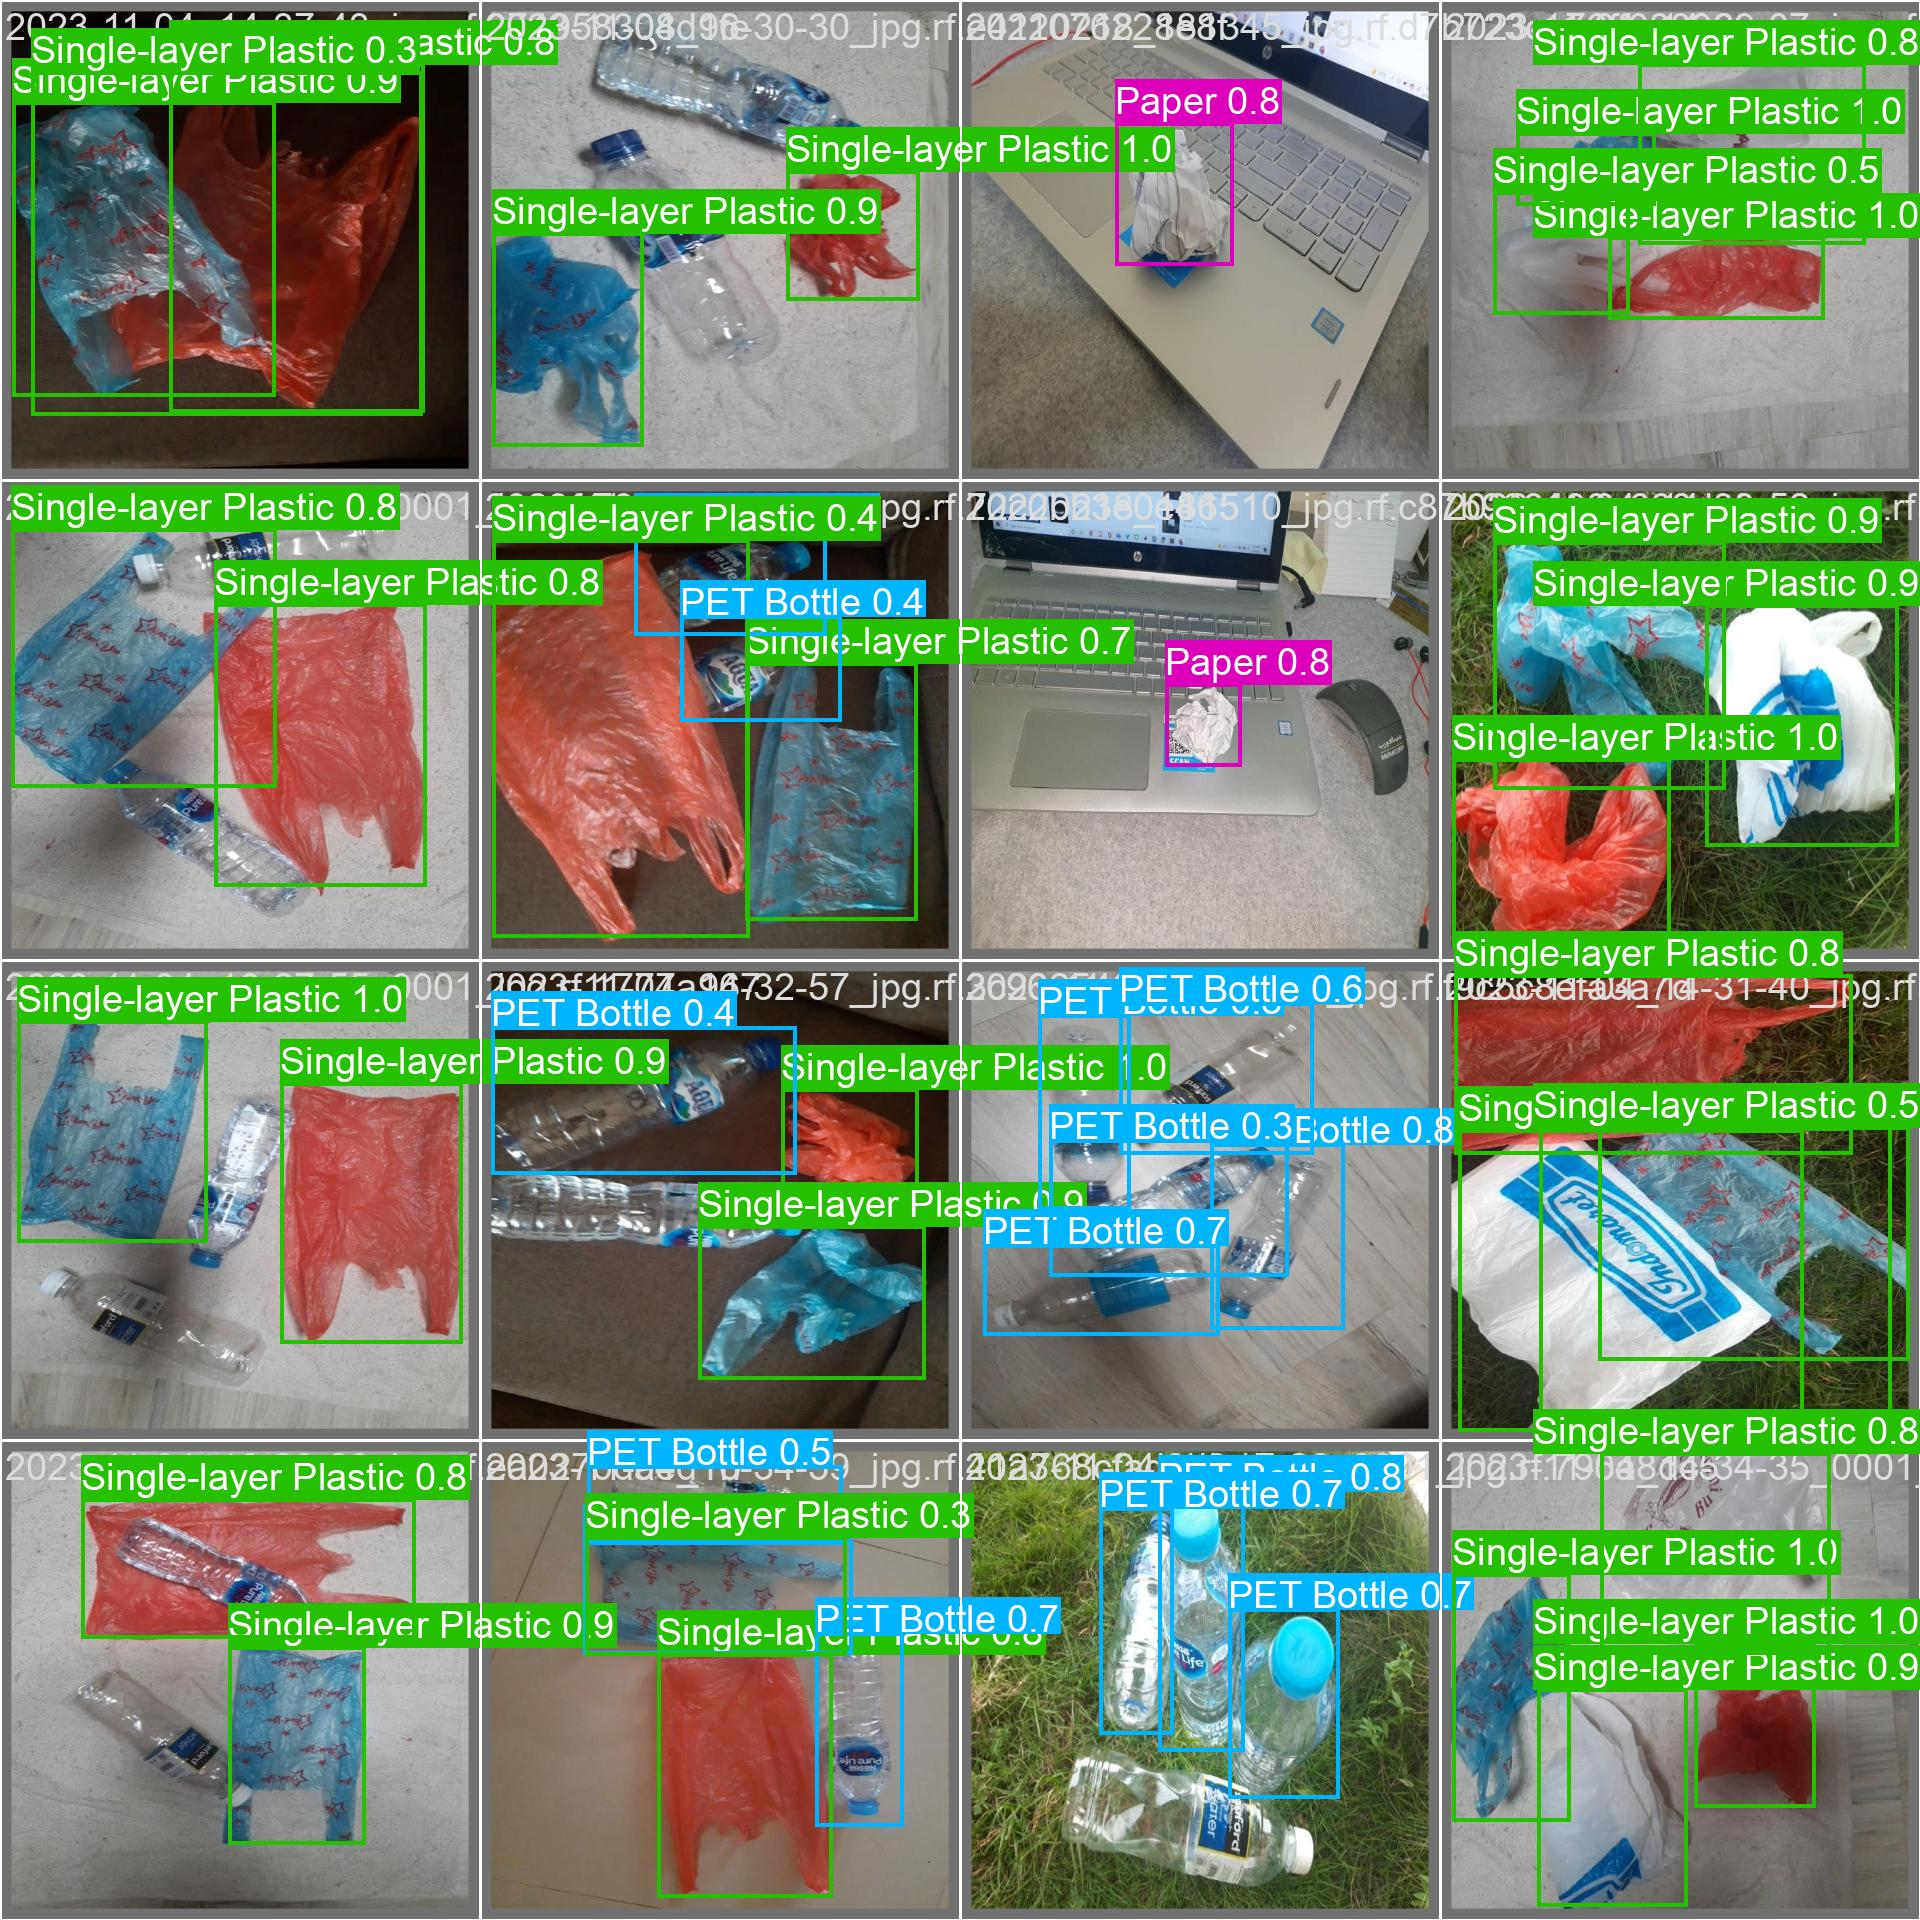

In [12]:
from IPython.display import Image
%cd /content
Image(filename='/content/runs/detect/train2/val_batch2_pred.jpg', width=800)

/content


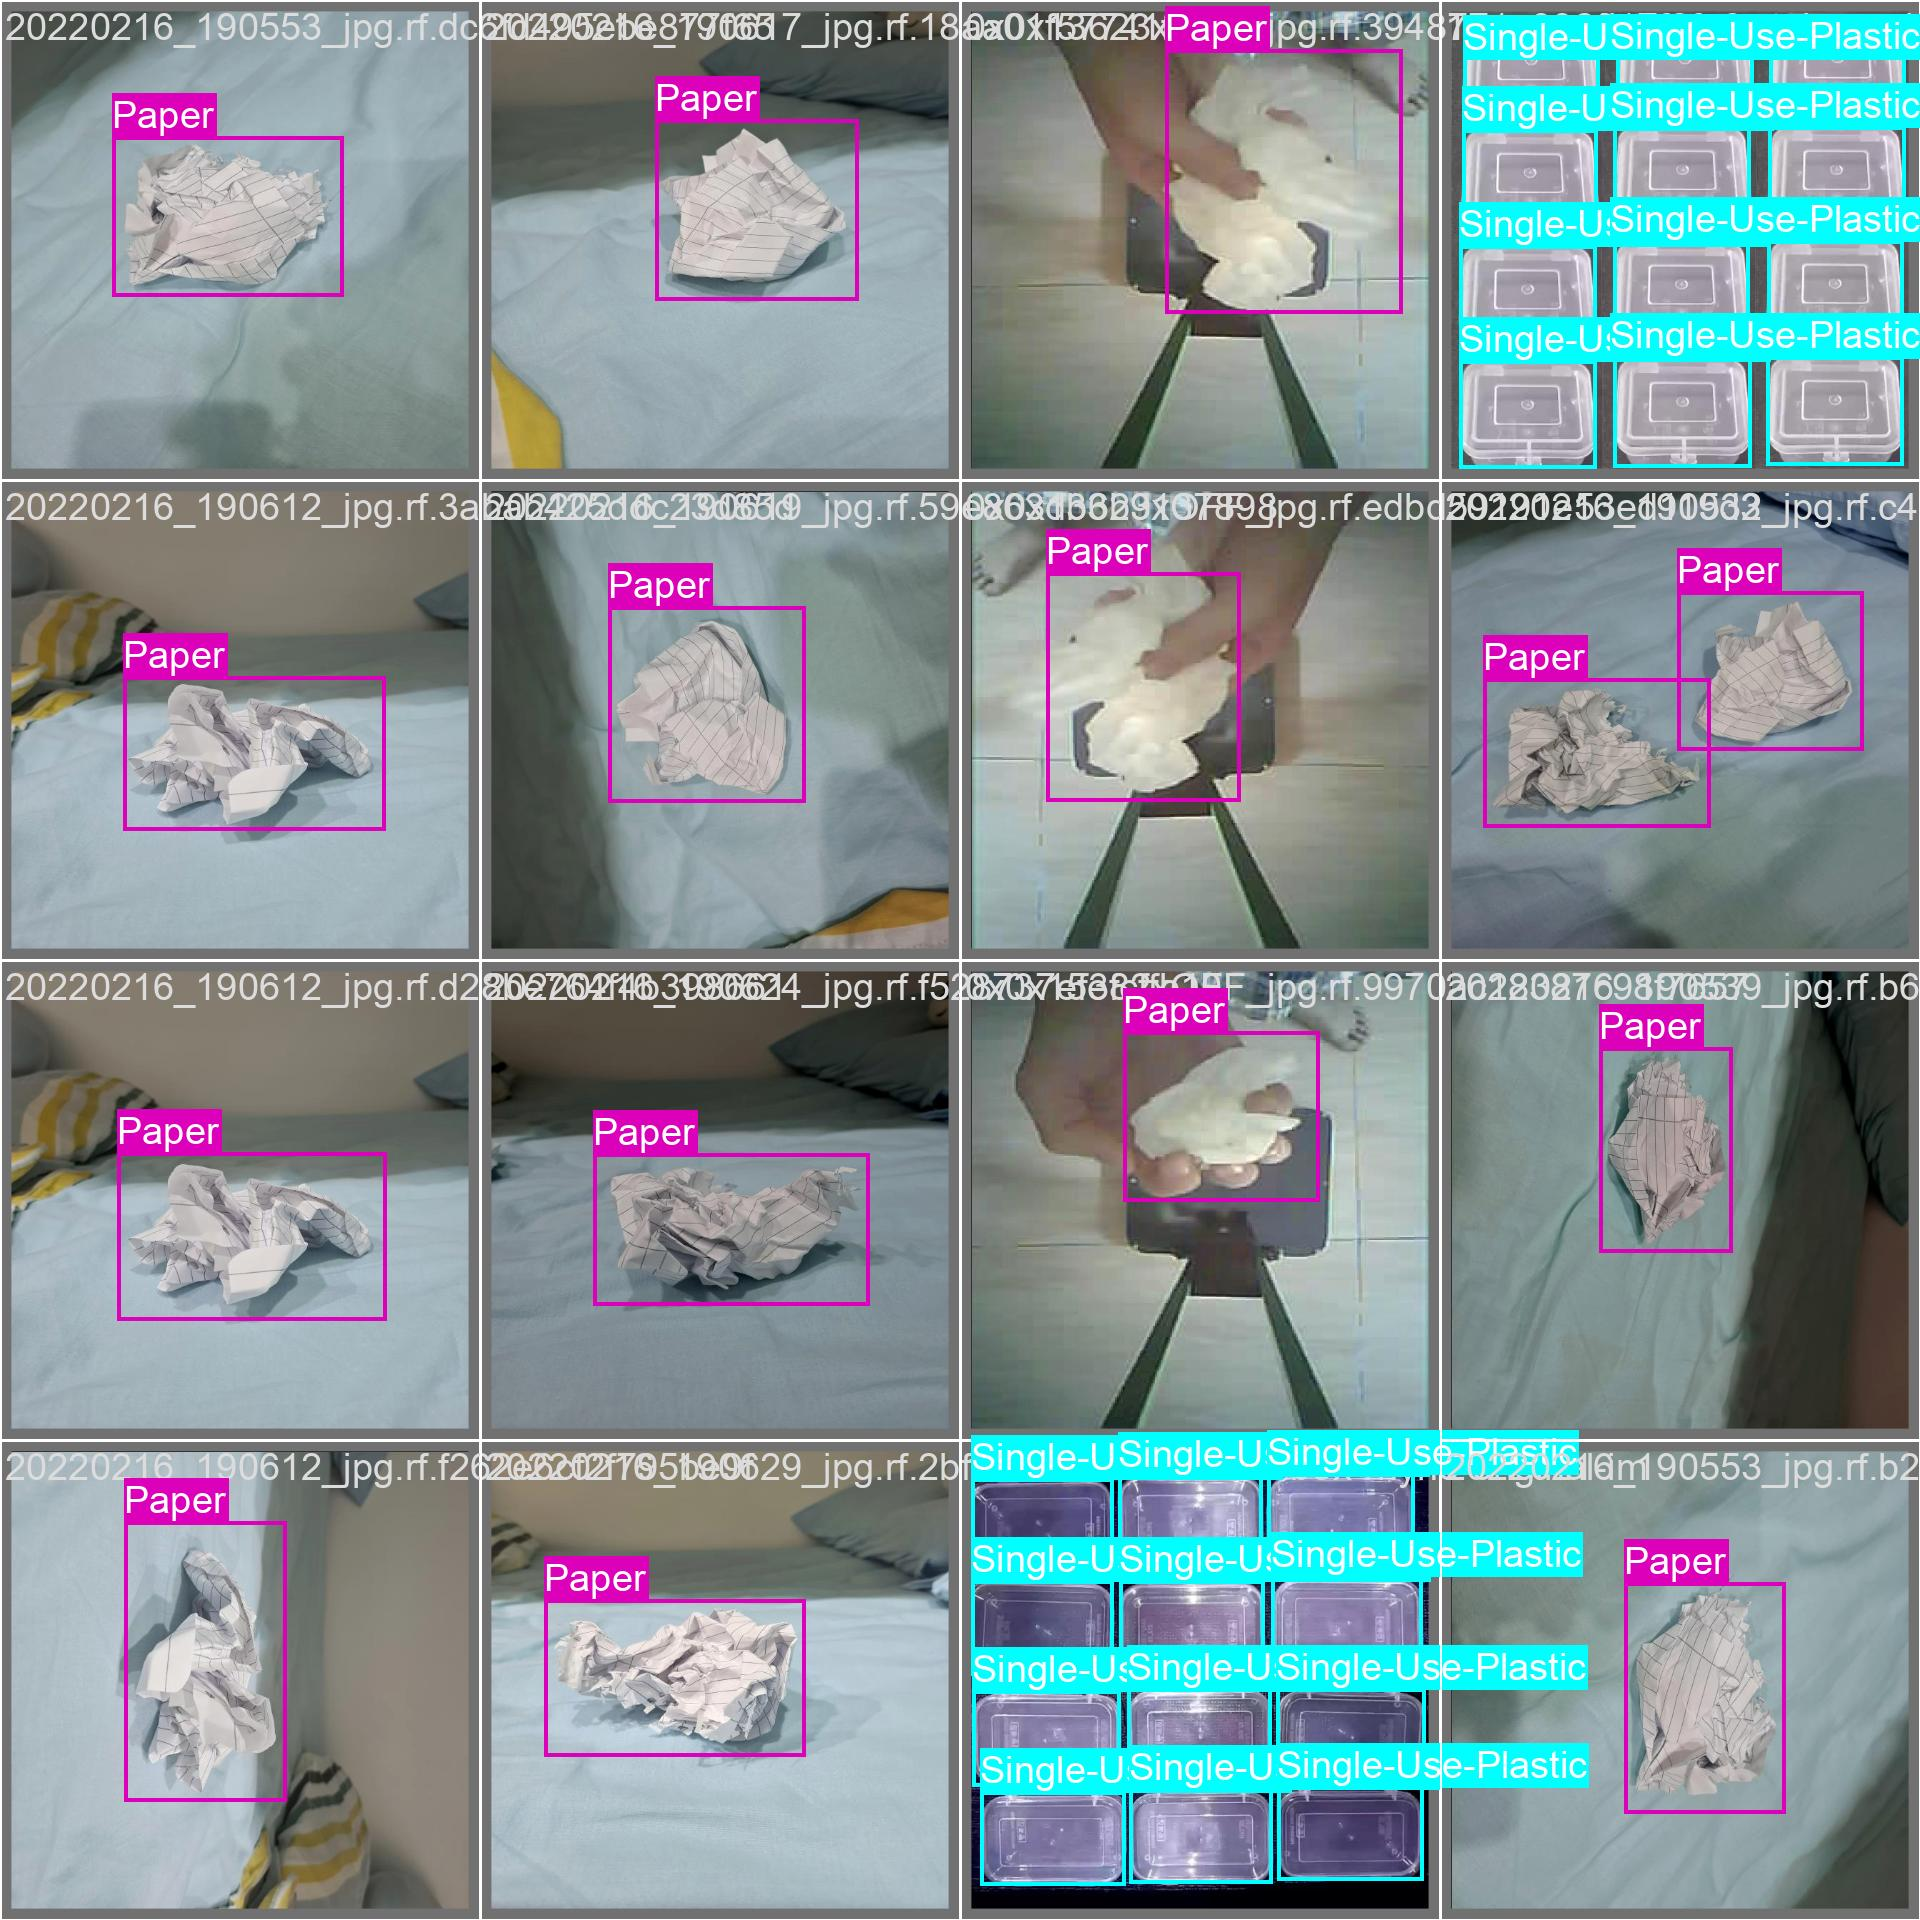

In [14]:
from IPython.display import Image
%cd /content
Image(filename='/content/runs/detect/train2/val_batch1_labels.jpg', width=800)

In [16]:
import pickle

# Load the trained weights
weights_path = '/content/runs/detect/train2/weights/best.pt'  # Replace with your actual path
# Load and convert the weights to a pickle file
with open(weights_path, 'rb') as f:
    weights = f.read()
pickle.dump(weights, open('yolov8.pkl', 'wb'))

In [1]:
from google.colab import files
files.download('yolov8.pkl')

FileNotFoundError: Cannot find file: yolov8.pkl

In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

model = YOLO("/content/best (3).pt")

# Run inference with lower confidence
results = model("/content/84a57c1a5ba6f91ba50671c8bd5345d1.jpg", conf=0.1, imgsz=1280)

annotated_image = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print detected classes
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Class: {model.names[cls_id]}, Confidence: {conf:.2f}")

ModuleNotFoundError: No module named 'ultralytics'

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00



image 1/1 /content/th.jpeg: 1280x1280 2 Cardboard Papers, 19.7ms
Speed: 15.4ms preprocess, 19.7ms inference, 3.7ms postprocess per image at shape (1, 3, 1280, 1280)


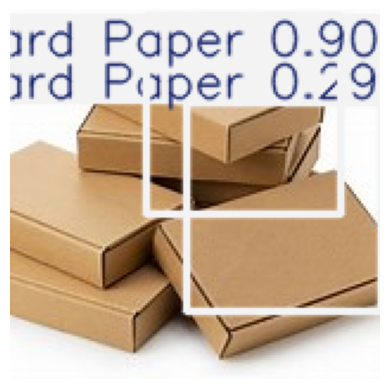

Class: Cardboard Paper, Confidence: 0.90
Class: Cardboard Paper, Confidence: 0.29


In [6]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

model = YOLO("/content/best (3).pt")

# Run inference with lower confidence
results = model("/content/th.jpeg", conf=0.1, imgsz=1280)

annotated_image = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print detected classes
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Class: {model.names[cls_id]}, Confidence: {conf:.2f}")